In [1]:
## This script is to plot Sensitivity as calculated by 
## SENSITIVITY_PWV-PWVgrid_CALC.ipynb
## Created by C. Bayu Risanto, S.J. (23 February 2024)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import random
import pandas as pd
import xarray as xr
from scipy.interpolate import griddata
from scipy.io import savemat,loadmat
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import math as math
import time
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mplotcolors
from matplotlib import cm
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj, transform
from datetime import date, datetime, timedelta
import os 
import glob
from datetime import date, datetime, timedelta
## opener
def readse(mfile):
    df = loadmat(mfile)
    sens = df['SENS']
    return sens
def readp(mfile):
    df = loadmat(mfile)
    pval = df['PVAL']
    return pval
def read_latlon(ncfile):
    dx = xr.open_dataset(ncfile)
    lat = dx.XLAT[0,:,:]
    lon = dx.XLONG[0,:,:]
    return lat,lon

In [2]:
## read HEIGHT data
path = '/home/bayu/DATA/ARIZONA_PRO/DART_runs/20210815_06Z_40mem_06Z_0035_6cyc_noassim/extract/'
f = 'SITE_HGT_06Z_40mem_06Z_0035_6cyc_assim.mat'
dh = loadmat(path+f)
names = dh['name1']
hgt = dh['heights']

## get the name and height from WRF -DA
name1 = []
for i in range(len(names)):
    n1 = names[i][0][0]
    name1.append(n1)
name1 = np.array(name1)

height1 = []
for i in range(len(hgt)):
    h1 = np.round(hgt[i][0],2)
    height1.append(h1)
height1 = np.array(height1)

In [3]:
## declare site of interest for instance based on height
highthres = 1000
mo = np.where(height1 <= highthres)
siteM = name1[mo] 
siteM1 = ['ERAU','MORT','MING','KP52','P004'];
siteM2 = ['BIGE','SA46','KITT','P014','AZAM'];
print(siteM)

['AZAM' 'AZBH' 'AZSF' 'GMPK' 'P001' 'P003' 'P623' 'SA46' 'TNPP']


In [4]:
## read data
dirin = '20210815_06Z_40mem_06Z_0035_6cyc_noassim'
path = '/home/bayu/DATA/ARIZONA_PRO/DART_runs/'+dirin+'/extract/SENSITIVITY/'
fis1 = 'sensitive_PWV-2021-08-15_13:00-'
fis2 = 'sensitive_PWV-2021-08-15_14:00-'
fis3 = 'sensitive_PWV-2021-08-15_15:00-'
sens1 = [readse(path+fis1+siteM1[i]+'.mat') for i in range(len(siteM1))]
sens1 = np.asarray(sens1)
sens2 = [readse(path+fis2+siteM1[i]+'.mat') for i in range(len(siteM1))]
sens2 = np.asarray(sens2)
sens3 = [readse(path+fis3+siteM1[i]+'.mat') for i in range(len(siteM1))]
sens3 = np.asarray(sens3)

sens4 = [readse(path+fis1+siteM2[i]+'.mat') for i in range(len(siteM2))]
sens4 = np.asarray(sens4)
sens5 = [readse(path+fis2+siteM2[i]+'.mat') for i in range(len(siteM2))]
sens5 = np.asarray(sens5)
sens6 = [readse(path+fis3+siteM2[i]+'.mat') for i in range(len(siteM2))]
sens6 = np.asarray(sens6)

pval1 = [readp(path+fis1+siteM1[i]+'.mat') for i in range(len(siteM1))]
pval1 = np.asarray(pval1)
pval2 = [readp(path+fis2+siteM1[i]+'.mat') for i in range(len(siteM1))]
pval2 = np.asarray(pval2)
pval3 = [readp(path+fis3+siteM1[i]+'.mat') for i in range(len(siteM1))]
pval3 = np.asarray(pval3)

pval4 = [readp(path+fis1+siteM2[i]+'.mat') for i in range(len(siteM2))]
pval4 = np.asarray(pval4)
pval5 = [readp(path+fis2+siteM2[i]+'.mat') for i in range(len(siteM2))]
pval5 = np.asarray(pval5)
pval6 = [readp(path+fis3+siteM2[i]+'.mat') for i in range(len(siteM2))]
pval6 = np.asarray(pval6)

nsta,ny,nx = sens1.shape

In [5]:
print(sens1.shape)

(5, 405, 684)


In [6]:
## set p-value threhold
nan = float('nan')
thres = 0.05; #0.05
sens1_f = [[[nan if pval1[k,j,i]>thres else sens1[k,j,i] 
            for i in range(nx)] for j in range(ny)] for k in range(nsta)] 
sens1_f = np.asarray(sens1_f)  

sens2_f = [[[nan if pval2[k,j,i]>thres else sens2[k,j,i] 
            for i in range(nx)] for j in range(ny)] for k in range(nsta)] 
sens2_f = np.asarray(sens2_f) 

sens3_f = [[[nan if pval3[k,j,i]>thres else sens3[k,j,i] 
            for i in range(nx)] for j in range(ny)] for k in range(nsta)] 
sens3_f = np.asarray(sens3_f) 


sens4_f = [[[nan if pval4[k,j,i]>thres else sens4[k,j,i] 
            for i in range(nx)] for j in range(ny)] for k in range(nsta)] 
sens4_f = np.asarray(sens4_f)  

sens5_f = [[[nan if pval5[k,j,i]>thres else sens5[k,j,i] 
            for i in range(nx)] for j in range(ny)] for k in range(nsta)] 
sens5_f = np.asarray(sens5_f) 

sens6_f = [[[nan if pval6[k,j,i]>thres else sens6[k,j,i] 
            for i in range(nx)] for j in range(ny)] for k in range(nsta)] 
sens6_f = np.asarray(sens6_f) 

## compute mean
msens1_f = np.nanmean(sens1_f,axis=0)
msens2_f = np.nanmean(sens2_f,axis=0)
msens3_f = np.nanmean(sens3_f,axis=0)

msens4_f = np.nanmean(sens4_f,axis=0)
msens5_f = np.nanmean(sens5_f,axis=0)
msens6_f = np.nanmean(sens6_f,axis=0)

In [7]:
print(sens1_f.shape)

(5, 405, 684)


In [8]:
## get obs data 227 is AUG 15
obs_link = '/home/bayu/DATA/ARIZONA_PRO/OBS/GPS_2021/GPS_DAVID-SUOMI_hr-REV/'
fobs = 'TransDS_hr_2021.228.12.00.dat'
d_obs = pd.read_csv(obs_link+fobs,header=None,delimiter=r"\s+")
sta = d_obs.iloc[:,0].tolist()
pwv_obs = d_obs.iloc[:,5].tolist()

In [9]:
## get the obs lat lon declared SITE above 
obslatlon_link = '/home/bayu/DATA/ARIZONA_PRO/metadata/'
flatlon = 'GPS_DAVID-SUOMI_sites_2021.txt'
latlon = pd.read_csv(obslatlon_link+flatlon,header=None,delimiter=r"\s+")
n_latlon1 = latlon[latlon.iloc[:,3].isin(siteM1)]
n_latlon2 = latlon[latlon.iloc[:,3].isin(siteM2)]
##m_latlon = n_latlon[n_latlon.iloc[:,3].isin(siteM)]  ## filter out based on the sites of interest
Olon1 = n_latlon1.iloc[:,0].tolist()
Olat1 = n_latlon1.iloc[:,1].tolist()
Oname1 = n_latlon1.iloc[:,3].tolist()

Olon2 = n_latlon2.iloc[:,0].tolist()
Olat2 = n_latlon2.iloc[:,1].tolist()
Oname2 = n_latlon2.iloc[:,3].tolist()

In [10]:
print(Oname2)

['AZAM', 'BIGE', 'KITT', 'P014', 'SA46']


In [11]:
## get latlon
pathlx = '/home/bayu/DATA/ARIZONA_PRO/metadata/'
xlat,xlon = read_latlon(pathlx+'lonlat.nc')

## get contour hgt
ds = xr.open_dataset('/home/bayu/DATA/ARIZONA_PRO/metadata/HGT_d01.nc')
HGT = ds.HGT[0,:,:]
HXLAT = ds.XLAT[0,:,:]
HXLON = ds.XLONG[0,:,:]

## get rid of anything less than 0 m
HGT = HGT.where(HGT >= 1)

In [12]:
xticks = np.arange(-115.,-109,1)
yticks = np.arange(31.,38.,1)
## create background
crs = ccrs.PlateCarree()
def plot_background(ax):
    ax.set_extent([-115.,-109.,31.5,37.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=1.4,zorder=3)
    #ax.add_feature(cfeature.BORDERS,linestyle=':',linewidth=0.7,zorder=3)
    ax.add_feature(cfeature.STATES,linestyle=':',linewidth=0.7,zorder=3)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.set_xticklabels(xticks, rotation=0, fontsize=12)
    ax.set_yticklabels(yticks, rotation=0, fontsize=12)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.contour(HXLON,HXLAT,HGT,6,vmin=0,vmax=2500,colors='k',linewidths=0.6)
    
    gl = ax.gridlines(ccrs.PlateCarree(),draw_labels=False,linewidth=2,color='gray',
                     alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xlines = False; gl.ylines = False
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    
    return ax

In [13]:
## color cape
#var_range = np.arange(-2,2.1,0.2)
var_range = np.arange(-6,6.1,0.8)
var_col = cm.get_cmap('Spectral',61)
varcol = var_col(np.linspace(0,1,61))
VARcol = mplotcolors.ListedColormap(varcol,'probability').reversed()
var_norm = mplotcolors.BoundaryNorm(var_range,VARcol.N)
var_diff = np.arange(-700,701,70)

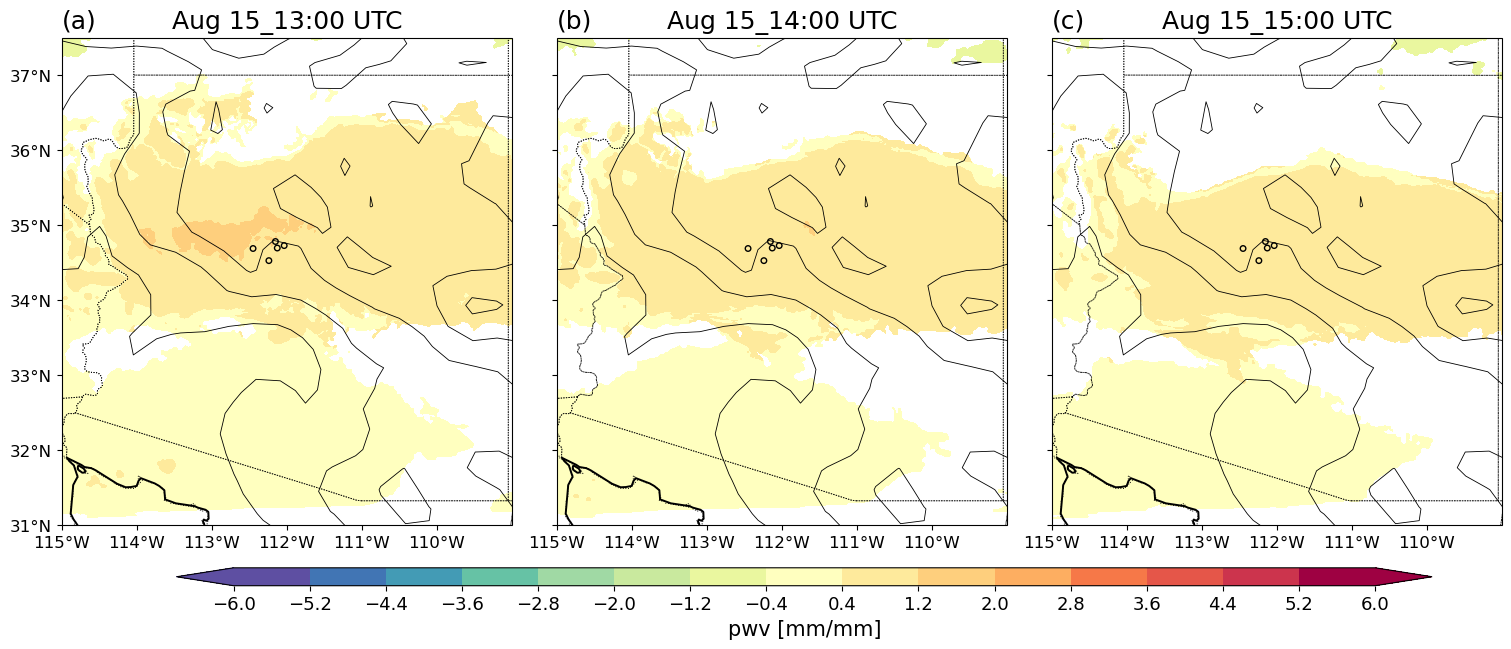

In [14]:
###########################################
# Plot #           
###########################################
projection = ccrs.PlateCarree()
fig, axe = plt.subplots(1, 3, figsize=(18, 12),
                                   subplot_kw={'projection': projection})
## AX1
axlist = axe.flatten()
for ax1 in axlist:
    plot_background(ax1)
    p0 = axlist[0].contourf(xlon,xlat,msens1_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,) 
    p1 = axlist[1].contourf(xlon,xlat,msens2_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,)
    p2 = axlist[2].contourf(xlon,xlat,msens3_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,)

    ## set title
    t0 = axlist[0].set_title('Aug '+fis1[-9:-1]+ ' UTC',
                            loc='center',pad=7,fontsize=18)
    axlist[0].set_title('(a)',loc='left',pad=7,fontsize=18)
    t1 = axlist[1].set_title('Aug '+fis2[-9:-1]+ ' UTC',
                            loc='center',pad=7,fontsize=18)
    axlist[1].set_title('(b)',loc='left',pad=7,fontsize=18)
    t2 = axlist[2].set_title('Aug '+fis3[-9:-1]+ ' UTC',
                            loc='center',pad=7,fontsize=18)
    axlist[2].set_title('(c)',loc='left',pad=7,fontsize=18)

    ## obs
    s0 = axlist[0].scatter(Olon1,Olat1,s=16,edgecolor='k')
    s0.set_facecolor('none')
    s1 = axlist[1].scatter(Olon1,Olat1,s=16,edgecolor='k')
    s1.set_facecolor('none')
    s2 = axlist[2].scatter(Olon1,Olat1,s=16,edgecolor='k')
    s2.set_facecolor('none')
    
    axlist[1].set_yticklabels([]);axlist[2].set_yticklabels([])
    
#Add precip colorbar
cbar0 = fig.colorbar(p0,ticks=var_range,ax=axe,orientation='horizontal',
                    shrink=0.9,aspect=70,pad=0.02,anchor=(0.5,-0.6))
cbar0.ax.tick_params(labelsize=13)
cbar0.set_label('pwv [mm/mm]',fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace= 0.0)

## SAVE
dir_out = '/home/bayu/Documents/ARIZONA-WRF/PLOTS/PWV/'+dirin+'/'
plotfile  = 'PWV-PWV-SENS-init_to_13-14-15_P004'+str(highthres)+'.png'
##sf = fig.savefig(dir_out+plotfile, dpi=300, bbox_inches='tight')

## CLOSE
plt.show()
plt.close()

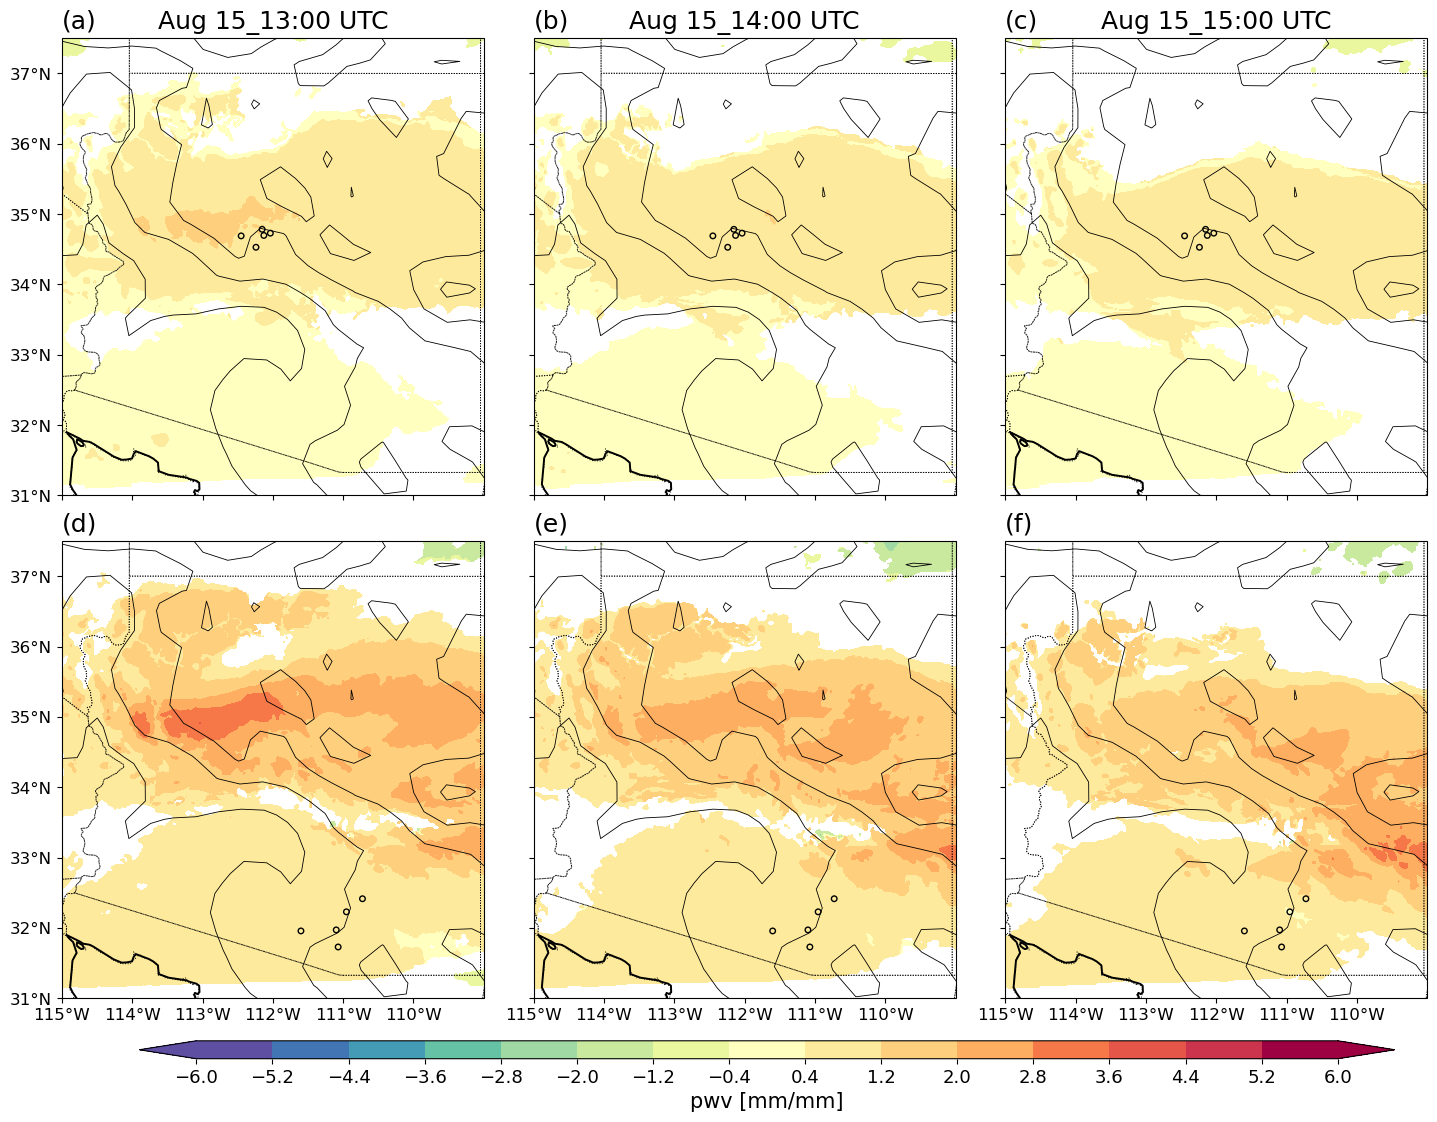

In [17]:
###########################################
# Plot # TWO CLUSTERS
###########################################
projection = ccrs.PlateCarree()
fig, axe = plt.subplots(2, 3, figsize=(18, 12),
                                   subplot_kw={'projection': projection})
## AX1
axlist = axe.flatten()
for ax1 in axlist:
    plot_background(ax1)
    p0 = axlist[0].contourf(xlon,xlat,msens1_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,) 
    p1 = axlist[1].contourf(xlon,xlat,msens2_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,)
    p2 = axlist[2].contourf(xlon,xlat,msens3_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,)
    p3 = axlist[3].contourf(xlon,xlat,msens4_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,) 
    p4 = axlist[4].contourf(xlon,xlat,msens5_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,)
    p5 = axlist[5].contourf(xlon,xlat,msens6_f,
                           var_range,cmap=VARcol,norm=var_norm,extend='both',transform=projection,)

    ## set title
    t0 = axlist[0].set_title('Aug '+fis1[-9:-1]+ ' UTC',
                            loc='center',pad=7,fontsize=18)
    axlist[0].set_title('(a)',loc='left',pad=7,fontsize=18)
    t1 = axlist[1].set_title('Aug '+fis2[-9:-1]+ ' UTC',
                            loc='center',pad=7,fontsize=18)
    axlist[1].set_title('(b)',loc='left',pad=7,fontsize=18)
    t2 = axlist[2].set_title('Aug '+fis3[-9:-1]+ ' UTC',
                            loc='center',pad=7,fontsize=18)
    axlist[2].set_title('(c)',loc='left',pad=7,fontsize=18)
    axlist[3].set_title('(d)',loc='left',pad=7,fontsize=18)
    axlist[4].set_title('(e)',loc='left',pad=7,fontsize=18)
    axlist[5].set_title('(f)',loc='left',pad=7,fontsize=18)

    ## obs
    s0 = axlist[0].scatter(Olon1,Olat1,s=16,edgecolor='k')
    s0.set_facecolor('none')
    s1 = axlist[1].scatter(Olon1,Olat1,s=16,edgecolor='k')
    s1.set_facecolor('none')
    s2 = axlist[2].scatter(Olon1,Olat1,s=16,edgecolor='k')
    s2.set_facecolor('none')

    s3 = axlist[3].scatter(Olon2,Olat2,s=16,edgecolor='k')
    s3.set_facecolor('none')
    s4 = axlist[4].scatter(Olon2,Olat2,s=16,edgecolor='k')
    s4.set_facecolor('none')
    s5 = axlist[5].scatter(Olon2,Olat2,s=16,edgecolor='k')
    s5.set_facecolor('none')
    
    axlist[1].set_yticklabels([]);axlist[2].set_yticklabels([]);axlist[1].set_xticklabels([]);axlist[2].set_xticklabels([])
    axlist[0].set_xticklabels([])
    axlist[4].set_yticklabels([]);axlist[5].set_yticklabels([])
    
#Add precip colorbar
cbar0 = fig.colorbar(p0,ticks=var_range,ax=axe,orientation='horizontal',
                    shrink=0.9,aspect=70,pad=0.02,anchor=(0.5,-0.6))
cbar0.ax.tick_params(labelsize=13)
cbar0.set_label('pwv [mm/mm]',fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=-0.05, 
                    hspace= 0.1)

## SAVE
dir_out = '/home/bayu/PLOTS/ARIZONA_PRO/sensitivity/'
plotfile  = 'PWV-PWV-SENS-init_to_13-14-15_2clusters.png'
sf = fig.savefig(dir_out+plotfile, dpi=300, bbox_inches='tight')

## CLOSE
plt.show()
plt.close()